Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pickle
import os

Image Preprocessing

In [ ]:
train_dir = r'C:\Users\rishi\OneDrive\Desktop\Amrita\S7\Mobile Application Development\Project\Indian Food Images'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3200 images belonging to 80 classes.
Found 800 images belonging to 80 classes.


Loading Base Xception Model

In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
100/100 [==============================] - 66s 599ms/step - loss: 4.1250 - accuracy: 0.0731 - val_loss: 3.5583 - val_accuracy: 0.2212
Epoch 2/10
100/100 [==============================] - 59s 586ms/step - loss: 3.3434 - accuracy: 0.1922 - val_loss: 2.7802 - val_accuracy: 0.3650
Epoch 3/10
100/100 [==============================] - 59s 588ms/step - loss: 2.8228 - accuracy: 0.2763 - val_loss: 2.4017 - val_accuracy: 0.4187
Epoch 4/10
100/100 [==============================] - 59s 587ms/step - loss: 2.5021 - accuracy: 0.3425 - val_loss: 2.2203 - val_accuracy: 0.4663
Epoch 5/10
100/100 [==============================] - 59s 588ms/step - loss: 2.1844 - accuracy: 0.4150 - val_loss: 2.0469 - val_accuracy: 0.4787
Epoch 6/10
100/100 [==============================] - 59s 589ms/step - loss: 2.0516 - accuracy: 0.4462 - val_loss: 1.9682 - val_accuracy: 0.4950
Epoch 7/10
100/100 [==============================] - 87s 876ms/step - loss: 1.8619 - accuracy: 0.4844 - val_loss: 1.8930 - val_ac

Fine-Tuning the Model

In [ ]:
for layer in base_model.layers[-20:]:
    layer.trainable = True

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
fine_tune_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/5
100/100 [==============================] - 80s 796ms/step - loss: 0.6731 - accuracy: 0.8109 - val_loss: 1.3489 - val_accuracy: 0.6212
Epoch 2/5
100/100 [==============================] - 70s 701ms/step - loss: 0.6495 - accuracy: 0.8191 - val_loss: 1.3577 - val_accuracy: 0.6263
Epoch 3/5
100/100 [==============================] - 70s 701ms/step - loss: 0.6493 - accuracy: 0.8259 - val_loss: 1.3454 - val_accuracy: 0.6350
Epoch 4/5
100/100 [==============================] - 70s 701ms/step - loss: 0.6470 - accuracy: 0.8231 - val_loss: 1.3478 - val_accuracy: 0.6325
Epoch 5/5
100/100 [==============================] - 70s 702ms/step - loss: 0.6076 - accuracy: 0.8409 - val_loss: 1.3481 - val_accuracy: 0.6388


Save The Model

In [ ]:
save_dir = r'C:\Users\rishi\OneDrive\Desktop\Amrita\S7\Mobile Application Development\Project\TensorflowModel\TensorflowModel\Model\model using Xception'
model_save_path = os.path.join(save_dir, 'indian_food_classification_xception_model.h5')
model.save(model_save_path)

class_indices_save_path = os.path.join(save_dir, 'class_indices.pkl')
with open(class_indices_save_path, 'wb') as f:
    pickle.dump(train_generator.class_indices, f)

print(f"Model and class indices saved successfully in {save_dir}!")


C:\Users\rishi\AppData\Roaming\Python\Python39\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Model and class indices saved successfully in C:\Users\rishi\OneDrive\Desktop\Amrita\S7\Mobile Application Development\Project\TensorflowModel\TensorflowModel\Model\model using Xception!


Visual Representation

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
EPOCHS = len(acc)

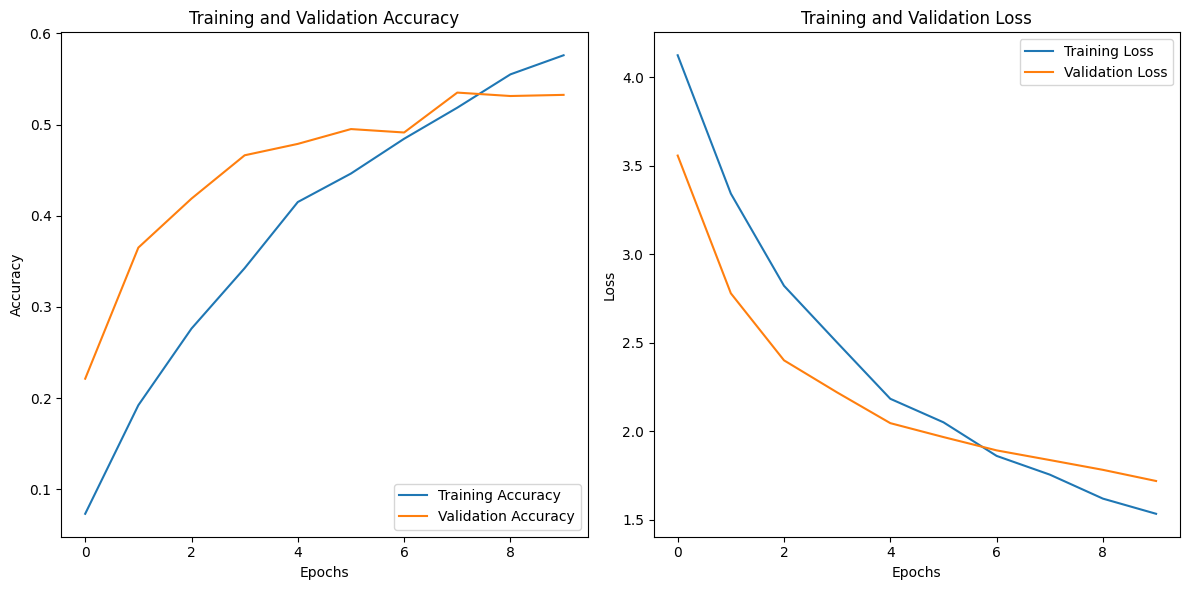

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

Confusion Matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
validation_generator.reset()
Y_true = validation_generator.classes
Y_pred = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = Y_true[:len(Y_pred_classes)]
cm = confusion_matrix(Y_true, Y_pred_classes)


<Figure size 1000x800 with 0 Axes>

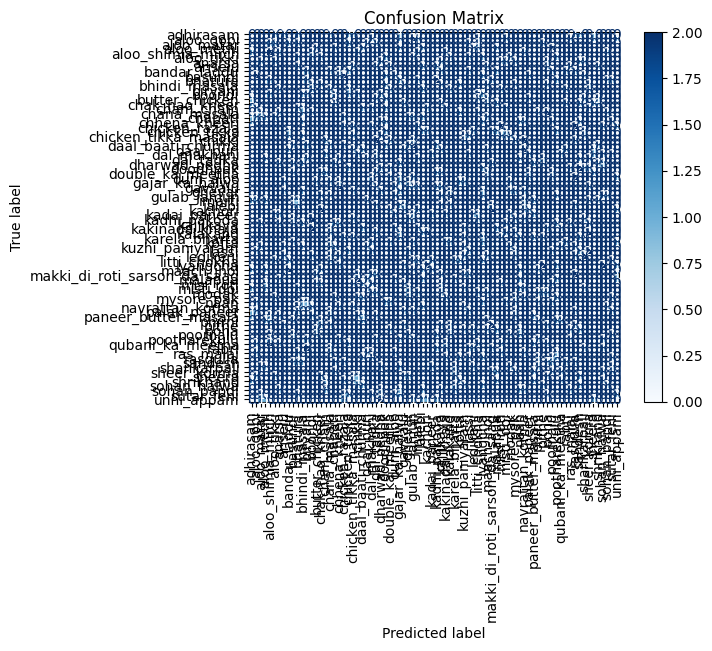

In [ ]:
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import pickle
from difflib import get_close_matches
import os
import pandas as pd

Function to load Model and Indices

In [ ]:
def load_model_and_indices(model_path, class_indices_path):
    model = load_model(model_path)
    with open(class_indices_path, 'rb') as f:
        class_indices = pickle.load(f)
    class_labels = {v: k for k, v in class_indices.items()}
    return model, class_labels

Function to get Nutrition Info

In [ ]:
def get_food_nutrition_info(predicted_label, df):
    food_items = df['FoodItem'].tolist()
    closest_matches = get_close_matches(predicted_label, food_items, n=1, cutoff=0.6)

    if closest_matches:
        best_match = closest_matches[0]
        food_info = df[df['FoodItem'] == best_match].iloc[0]
        return {
            'Best Match': best_match,
            'Calories': food_info['Cals_per100grams'],
            'KJ': food_info['KJ_per100grams']
        }
    else:
        return {'Error': 'No close match found'}

Function to Preprocess Input Image

In [ ]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array


Function to Predict Nutrition Info

In [ ]:
def predict_and_get_nutrition_info(img_path, model, class_labels, csv_df):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_label = class_labels[predicted_class[0]]
    nutrition_info = get_food_nutrition_info(predicted_label, csv_df)
    return predicted_label, nutrition_info

Load Model

In [ ]:
save_dir = r'C:\Users\rishi\OneDrive\Desktop\Amrita\S7\Mobile Application Development\Project\TensorflowModel\TensorflowModel\Model\model using Xception'
model_path = os.path.join(save_dir, 'indian_food_classification_xception_model.h5')
class_indices_path = os.path.join(save_dir, 'class_indices.pkl')
model, class_labels = load_model_and_indices(model_path, class_indices_path)

Load Calories Dataset

In [ ]:
csv_path = r'C:\Users\rishi\OneDrive\Desktop\Amrita\S7\Mobile Application Development\Project\TensorflowModel\TensorflowModel\Datasets\calories.csv'
calories_df = pd.read_csv(csv_path)

Load Input image

In [ ]:
img_path = r'C:\Users\rishi\OneDrive\Desktop\jal.jpeg'
predicted_label, nutrition_info = predict_and_get_nutrition_info(img_path, model, class_labels, calories_df)

Make Predictions

In [ ]:
print(f'Predicted Label: {predicted_label}')
print(f'Nutrition Information: {nutrition_info}')

Predicted Label: jalebi
Nutrition Information: {'Best Match': 'Jalebi', 'Calories': '300 cal', 'KJ': '1255 kJ'}


In [ ]:
import tensorflow as tf

# Load the model (example with SavedModel format)
model = tf.keras.models.load_model('path/to/your/model')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # Use `.from_saved_model` if using SavedModel format
tflite_model = converter.convert()

# Save the converted TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
